## **PREDIKSI CUSTOMER CHURN MENGGUNAKAN ARTIFICIAL NEURAL NETWORK (ANN)**

# *Kelompok 9*

* Masayu Franstika Oktaria - 120450016
* Mochammad Aditya Putra Suhendar - 120450058
* Adisya Ridia Nurahma - 120450056
* Junpito Salim - 120450086


# Import Library

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns

# EDA

In [ ]:
df = pd.read_csv("telecom_churn.csv")
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [ ]:
df.tail()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0
3332,0,74,1,1,3.70,0,234.4,113,100.0,13.30,13.7


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [ ]:
df.columns

Index(['Churn', 'AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins'],
      dtype='object')

In [ ]:
df.shape

(3333, 11)

check apakah ada yang kosong

In [ ]:
df.isnull().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

In [ ]:
df.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


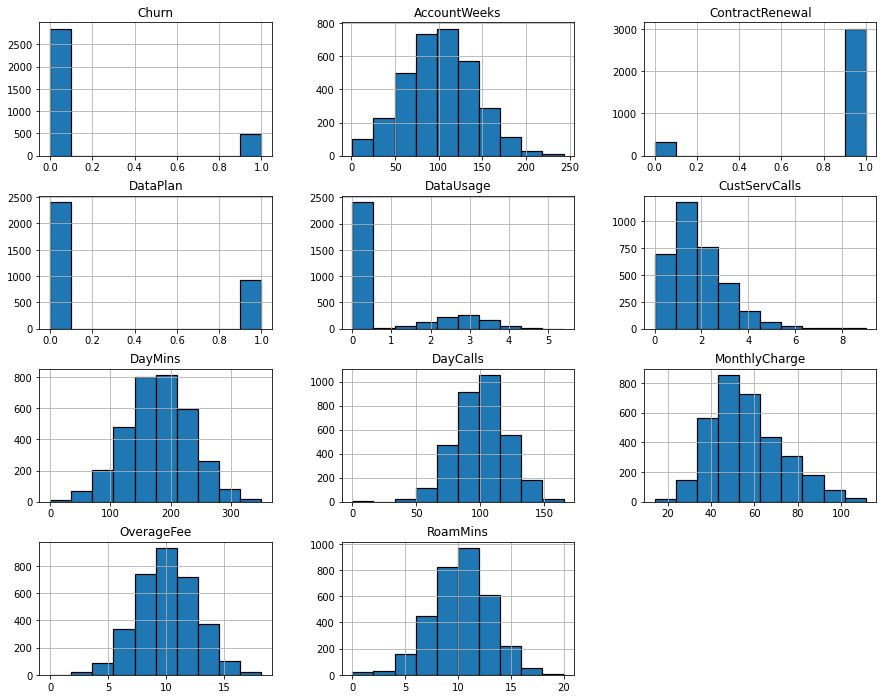

In [ ]:
df.hist(edgecolor='black', linewidth=1.2)
fig = plt.gcf()
fig.set_size_inches(15,12)
plt.show()

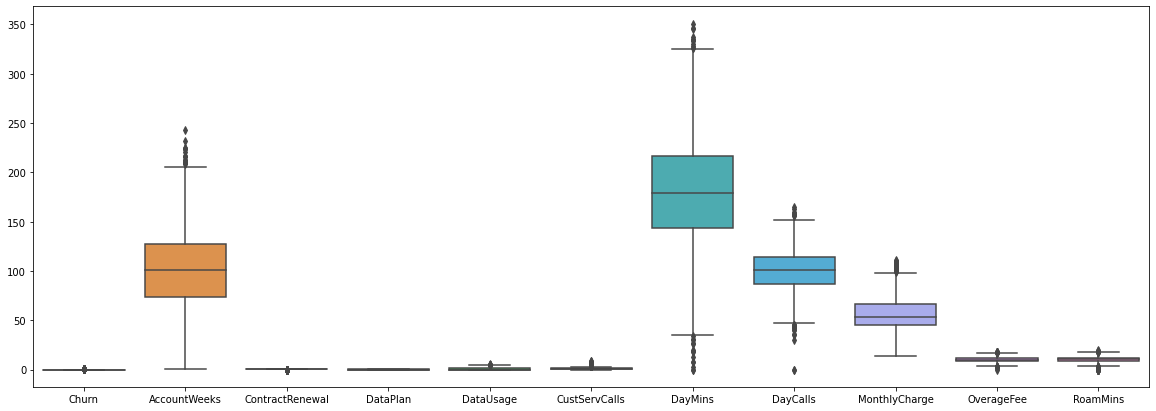

In [ ]:
plt.figure(figsize=(20,7))
sns.boxplot(data=df)

In [ ]:
df.corr().abs()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
Churn,1.000000,0.016541,0.259852,0.102148,0.087195,0.208750,0.205151,0.018459,0.072313,0.092812,0.068239
AccountWeeks,0.016541,1.000000,0.024735,0.002918,0.014391,0.003796,0.006216,0.038470,0.012581,0.006749,0.009514
ContractRenewal,0.259852,0.024735,1.000000,0.006006,0.019223,0.024522,0.049396,0.003755,0.047291,0.019105,0.045871
DataPlan,0.102148,0.002918,0.006006,1.000000,0.945982,0.017824,0.001684,0.011086,0.737490,0.021526,0.001318
DataUsage,0.087195,0.014391,0.019223,0.945982,1.000000,0.021723,0.003176,0.007962,0.781660,0.019637,0.162746
CustServCalls,0.208750,0.003796,0.024522,0.017824,0.021723,1.000000,0.013423,0.018942,0.028017,0.012964,0.009640
DayMins,0.205151,0.006216,0.049396,0.001684,0.003176,0.013423,1.000000,0.006750,0.567968,0.007038,0.010155
DayCalls,0.018459,0.038470,0.003755,0.011086,0.007962,0.018942,0.006750,1.000000,0.007963,0.021449,0.021565
MonthlyCharge,0.072313,0.012581,0.047291,0.737490,0.781660,0.028017,0.567968,0.007963,1.000000,0.281766,0.117433
OverageFee,0.092812,0.006749,0.019105,0.021526,0.019637,0.012964,0.007038,0.021449,0.281766,1.000000,0.011023


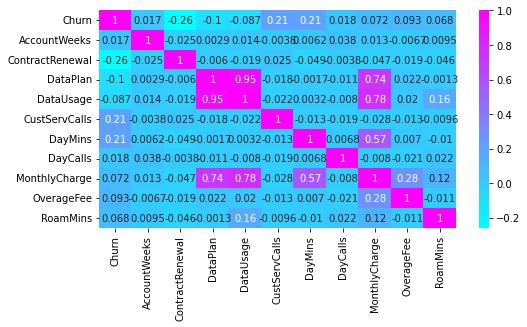

In [ ]:
plt.figure(figsize=(8,4))
sns.heatmap(df.corr(), annot=True, cmap='cool')
plt.show()

##sclaling nilai numerical

In [ ]:
cols_to_scale = ['AccountWeeks', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [ ]:
for col in df:
    print(f'{col}: {df[col].unique()}')

Churn: [0 1]
AccountWeeks: [0.52479339 0.43801653 0.56198347 0.34297521 0.30578512 0.48347107
 0.49586777 0.60330579 0.47933884 0.5785124  0.26446281 0.30165289
 0.69008264 0.38842975 0.25206612 0.66115702 0.34710744 0.38016529
 0.30991736 0.29752066 0.31404959 0.53305785 0.45454545 0.54132231
 0.71487603 0.23140496 0.21900826 0.0785124  0.19834711 0.58264463
 0.70661157 0.04545455 0.29338843 0.1446281  0.31818182 0.55785124
 0.61157025 0.40082645 0.55371901 0.13636364 0.65702479 0.26033058
 0.23966942 0.48760331 0.39669421 0.2107438  0.24380165 0.03719008
 0.39256198 0.3553719  0.33057851 0.2768595  0.51239669 0.47520661
 0.15289256 0.16115702 0.17355372 0.46280992 0.51652893 0.61570248
 0.5661157  0.66528926 0.3677686  0.20247934 0.33471074 0.59090909
 0.18595041 0.28512397 0.2231405  0.4338843  0.38429752 0.63636364
 0.32644628 0.42561983 0.40495868 0.49173554 0.44214876 0.5
 0.6446281  0.4214876  0.25619835 0.45867769 0.16528926 0.79338843
 0.24793388 0.37603306 0.53719008 0.669421

In [ ]:
df['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

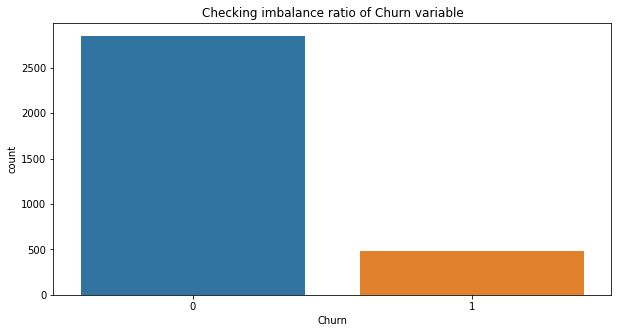

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(x = df['Churn'], data = df)
plt.title('Checking imbalance ratio of Churn variable')
plt.show()

# Train test split

In [ ]:
X = df.drop('Churn',axis='columns')
y = df['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [ ]:
X_train.shape

(2666, 10)

In [ ]:
X_test.shape

(667, 10)

In [ ]:
X_train[:10]

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
1286,0.438017,1,1.0,0.375926,0.111111,0.325827,0.800000,0.445015,0.549203,0.375
1765,0.454545,1,0.0,0.000000,0.444444,0.377993,0.757576,0.287770,0.608026,0.635
2961,0.400826,1,1.0,0.400000,0.666667,0.478905,0.490909,0.520041,0.448598,0.400
1271,0.330579,0,1.0,0.394444,0.111111,0.675884,0.460606,0.722508,0.726223,0.395
869,0.520661,0,0.0,0.048148,0.222222,0.515678,0.690909,0.386434,0.576141,0.370
437,0.409091,1,0.0,0.059259,0.000000,0.792474,0.460606,0.536485,0.485981,0.415
2197,0.545455,1,0.0,0.000000,0.222222,0.616306,0.406061,0.431655,0.610775,0.155
519,0.165289,1,0.0,0.038889,0.333333,0.578392,0.587879,0.371017,0.422760,0.450
2669,0.595041,1,0.0,0.000000,0.222222,0.368871,0.587879,0.246660,0.509621,0.055
2078,0.409091,1,0.0,0.000000,0.111111,0.373717,0.654545,0.246660,0.484332,0.215


In [ ]:
len(X_train.columns)

10

# Build a model (ANN) in tensorflow/keras

epoch = 1 kali ann melakukan forward dan bacward propagation

learning rate = 

bach size = berapa data yang di gunakan dala satu proses biasanya makin besar ukuran bach makin cepat perhitungan namun makan banyak memori

In [ ]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(10,), activation='relu'),
    keras.layers.Dense(5, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])



In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                110       
                                                                 
 dense_4 (Dense)             (None, 5)                 55        
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 171
Trainable params: 171
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.layers

In [ ]:
model.layers[0]

In [ ]:
w,b = model.layers[0].get_weights()
print(w)

[[ 0.5141281   0.04453403 -0.15635014 -0.03604245  0.3875432   0.06193089
   0.36941445  0.3815105   0.50324965 -0.12619689]
 [ 0.44264764 -0.03843707 -0.5376512  -0.53083205 -0.4984725   0.20055628
   0.32444036  0.45009857  0.2092585   0.04768288]
 [-0.34479353 -0.49763793 -0.1881074  -0.26690844  0.5352241   0.38814783
  -0.30916083  0.308554   -0.01059622 -0.34092972]
 [-0.09591541 -0.11700082  0.3424052  -0.442618   -0.5304144   0.36656415
   0.17330676  0.09921366  0.49071097  0.06420594]
 [ 0.16473669  0.48562777  0.14292186 -0.36348253 -0.26634234  0.18579769
  -0.5222304   0.09153771  0.04087353 -0.1956138 ]
 [ 0.23762435 -0.3437034   0.46669686  0.42796558 -0.20418137 -0.24100554
  -0.2551271  -0.31420112  0.35731006  0.29080564]
 [ 0.37696946  0.1899808  -0.2894453  -0.04939526 -0.2294128  -0.40859377
  -0.32482833  0.27397335 -0.14419886  0.33712673]
 [-0.2680187   0.1539343  -0.14333126 -0.3295194   0.07591271 -0.13696003
   0.3775363  -0.24729124  0.4008938   0.33319724]


In [ ]:
w,b = model.layers[1].get_weights()

In [ ]:
print(w)


[[ 0.2529506  -0.53400093  0.35794133 -0.23487657 -0.3916406 ]
 [-0.16875386  0.60427874  0.2587118  -0.4560639   0.09422874]
 [-0.25261903  0.01875287  0.6310547  -0.51919234 -0.3330842 ]
 [ 0.5648287  -0.04735535 -0.15219179 -0.1164006   0.43097228]
 [ 0.60690194 -0.1715875   0.07487226  0.11326241 -0.08605266]
 [-0.11023712 -0.10606104 -0.5174322  -0.02522022  0.18802488]
 [ 0.30099612 -0.3151148  -0.29879743  0.33787388  0.53262466]
 [ 0.3940335  -0.22854042  0.05603009  0.6064605   0.01597762]
 [ 0.13311261  0.37863618  0.45408493 -0.32165918 -0.6166691 ]
 [ 0.30732667 -0.03531861  0.26142251  0.13532197  0.20834142]]


In [ ]:
print(b)

[0. 0. 0. 0. 0.]


In [ ]:
w,b = model.layers[2].get_weights()
print(w)

[[-0.4812684 ]
 [-0.9530444 ]
 [ 0.32616258]
 [-0.17764187]
 [ 0.8967445 ]]


In [ ]:
print(b)

[0.]


## compiling model

In [ ]:
# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

###training the model

In [ ]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test,y_test))

Epoch 1/100
84/84 [==============================] - 1s 5ms/step - loss: 0.5251 - accuracy: 0.8488 - val_loss: 0.4094 - val_accuracy: 0.8621
Epoch 2/100
84/84 [==============================] - 0s 3ms/step - loss: 0.4143 - accuracy: 0.8533 - val_loss: 0.3840 - val_accuracy: 0.8621
Epoch 3/100
84/84 [==============================] - 0s 3ms/step - loss: 0.3968 - accuracy: 0.8533 - val_loss: 0.3618 - val_accuracy: 0.8621
Epoch 4/100
84/84 [==============================] - 0s 2ms/step - loss: 0.3827 - accuracy: 0.8533 - val_loss: 0.3495 - val_accuracy: 0.8621
Epoch 5/100
84/84 [==============================] - 0s 3ms/step - loss: 0.3746 - accuracy: 0.8533 - val_loss: 0.3422 - val_accuracy: 0.8621
Epoch 6/100
84/84 [==============================] - 0s 3ms/step - loss: 0.3694 - accuracy: 0.8530 - val_loss: 0.3337 - val_accuracy: 0.8651
Epoch 7/100
84/84 [==============================] - 0s 3ms/step - loss: 0.3639 - accuracy: 0.8541 - val_loss: 0.3309 - val_accuracy: 0.8636
Epoch 8/100
8

##visualizing learning curve

In [ ]:
df = pd.DataFrame(history.history)
df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.525135,0.848837,0.409380,0.862069
1,0.414315,0.853338,0.383977,0.862069
2,0.396807,0.853338,0.361824,0.862069
3,0.382723,0.853338,0.349516,0.862069
4,0.374584,0.853338,0.342215,0.862069


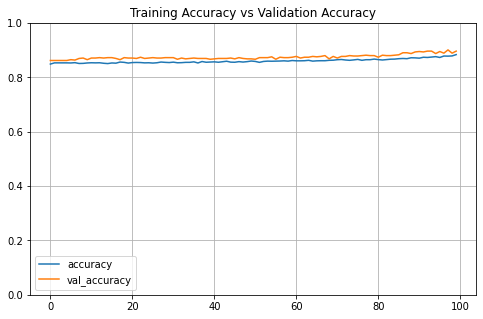

In [ ]:
df[['accuracy','val_accuracy']].plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1
plt.title('Training Accuracy vs Validation Accuracy')
plt.show()

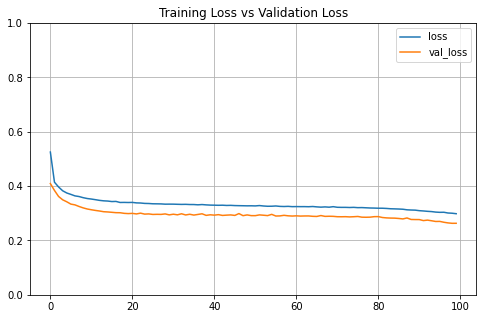

In [ ]:
df[['loss','val_loss']].plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.title('Training Loss vs Validation Loss')
plt.show()

##evaluasi model

In [ ]:
model.evaluate(X_test, y_test)

21/21 [==============================] - 0s 2ms/step - loss: 0.2631 - accuracy: 0.8966


[0.2631089985370636, 0.8965517282485962]

In [ ]:
yp = model.predict(X_test)
yp[:5]

21/21 [==============================] - 0s 1ms/step


array([[0.05046525],
       [0.05960138],
       [0.02064748],
       [0.03448398],
       [0.03097317]], dtype=float32)

In [ ]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [ ]:
y_pred[:10]

[0, 0, 0, 0, 0, 0, 1, 1, 0, 0]

In [ ]:
y_test[:10]

1879    0
1518    0
1813    0
890     0
1343    0
3072    1
546     1
2401    1
1827    0
758     0
Name: Churn, dtype: int64

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       575
           1       0.78      0.35      0.48        92

    accuracy                           0.90       667
   macro avg       0.84      0.67      0.71       667
weighted avg       0.89      0.90      0.88       667



Text(69.0, 0.5, 'Truth')

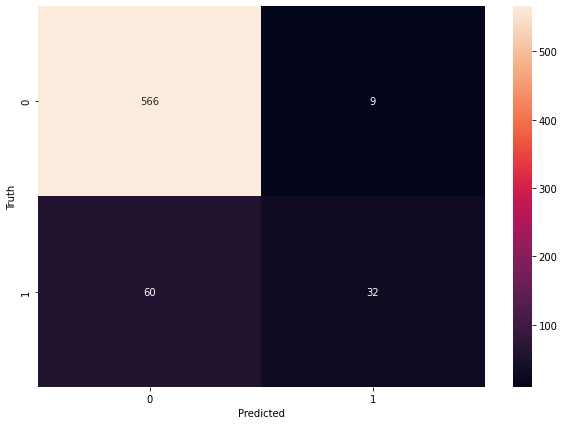

In [ ]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
y_test.shape

(667,)

# Accuracy

In [ ]:
round((566+32)/(566+32+9+60),2)

0.9

setalah di hitung manual akurannya sama dengan yang di evaluasi

# Precision for 0 class. i.e. Precision for customers who did not churn

In [ ]:
round(566/(566+61),2)

0.9

sama dengan report

# Precision for 1 class. i.e. Precision for customers who actually churned

In [ ]:
round(32/(32+60),2)

0.35

juga sama dengan report

# Recall for 0 class

In [ ]:
round(566/(566+9),2)

0.98

##recal for 1 class

In [ ]:
round(32/(32+60),2)

0.35